# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [4]:
import cv2
import os  
import numpy as np
import matplotlib.pyplot as plt

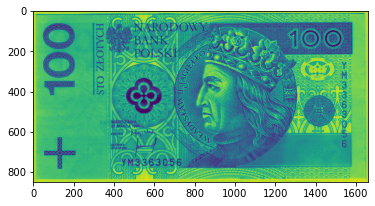

In [5]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
#wczytanie obrazu w skali szarej
img = cv2.imread('100zloty.jpg',0)

plt.imshow(img)
plt.show()

In [7]:
def img_to_binary(bit_number,bit_max):
    lst = []
    #Iterujemy po każdym pikselu obrazu i zmieniamy wartość piksela na binarną wykorzystając funkcję np.binary_repr()
    # która zwraca nam ciąg binarny . Zapisujemy każdy ciąg jako element w liście lst[]
    for i in range(img.shape[0]): #wysokość obrazu
        for j in range(img.shape[1]):  # szerokość obrazu
             lst.append(np.binary_repr(img[i][j] ,width=8)) #width to liczba bitów reprezentacji pikselu
# Otóż mamy listę lst[] zawierającą reprezentacje binarne pikselów obrazu
# Aby wydzielić potrzebną płaszczyźnę bitową mamy przeiterować po ciągu binarnym i zachować odpowiadający element w liście.
# Mnożymy przez 2 do potęgi płaszczyźni - 1, rekonstrujemy array do postaci macierzy odpowiadającego wymiaru
#   [x][x][x][x][x][x][x][x] - string
# 2^[7][6][5][4][3][2][1][0] 
    return (np.array([int(i[bit_max-bit_number]) for i in lst],dtype = np.uint8) * 2^(bit_number-8)).reshape(img.shape[0],img.shape[1])

eight_bit_img = img_to_binary(8,8)
seven_bit_img = img_to_binary(7,8)
six_bit_img = img_to_binary(6,8) 
five_bit_img = img_to_binary(5,8) 
four_bit_img = img_to_binary(4,8) 
three_bit_img = img_to_binary(3,8) 
two_bit_img = img_to_binary(2,8) 
one_bit_img = img_to_binary(1,8) 

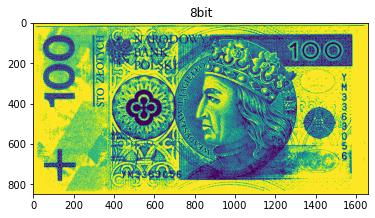

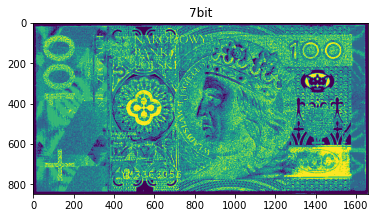

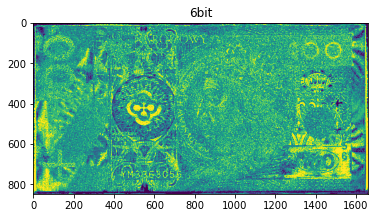

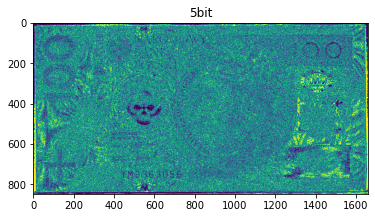

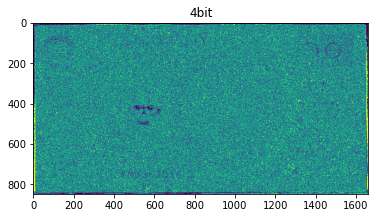

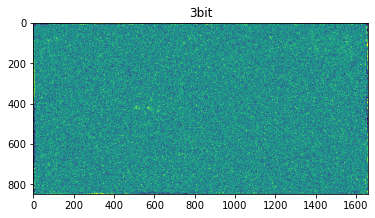

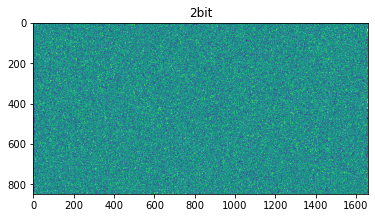

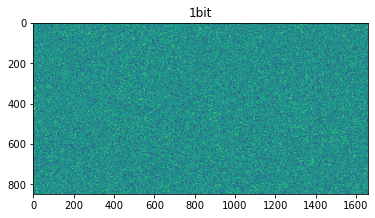

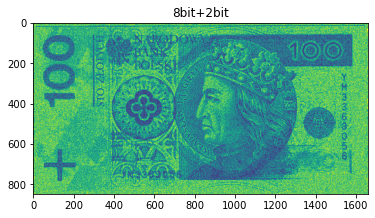

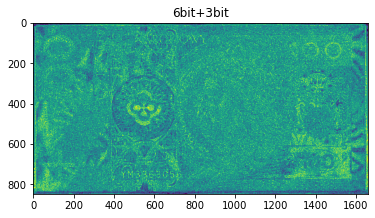

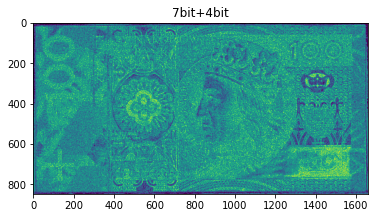

In [8]:
# Wyświetlenie
plt.imshow(eight_bit_img)
plt.title('8bit')
plt.show()
plt.imshow(seven_bit_img)
plt.title('7bit')
plt.show()
plt.imshow(six_bit_img)
plt.title('6bit')
plt.show()
plt.imshow(five_bit_img)
plt.title('5bit')
plt.show()
plt.imshow(four_bit_img)
plt.title('4bit')
plt.show()
plt.imshow(three_bit_img)
plt.title('3bit')
plt.show()
plt.imshow(two_bit_img)
plt.title('2bit')
plt.show()
plt.imshow(one_bit_img)
plt.title('1bit')
plt.show()

plt.imshow(eight_bit_img + two_bit_img)
plt.title('8bit+2bit')
plt.show()

plt.imshow(six_bit_img + three_bit_img)
plt.title('6bit+3bit')
plt.show()

plt.imshow(seven_bit_img + four_bit_img)
plt.title('7bit+4bit')
plt.show()